This notebook researches the first two project motivation question of:
1. "What are some defining characteristics of a Data Scientists/Machine Learning Specialists?" 
2. "What type(s) of technologies do Data Scientists/Machine Learning Specialists use?"

Within the Stack Overflow survey there are some interesting questions that may help us pull together some characteristics of Data Scientists and the technologies they use.  First lets import the modules we need along with the Stack Overflow 2019 Developer Survey data.

In [1]:
# Import the necessary modules and StackOverflow csv files for 2019.
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./2019/survey_results_public.csv')
schema = pd.read_csv('./2019/survey_results_schema.csv')
df.shape

(88883, 85)

---
A quick view of the survey results helps get a flavor for the underlying data:

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


---
A quick view of the survey schema gives us a feel for how the questions are stored and structured:

In [3]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


---
The key survey question with a type of "DevType" will help us determine what type of job roles the respondent has.  Here is the question that is presented to the survey takers:

In [4]:
list(schema[schema['Column'] == 'DevType']['QuestionText'])[0]

'Which of the following describe you? Please select all that apply.'

---
We want to create a few functions that will be utilized going forward.  They allow us to count and/or display various data pulled from the survey.

In [5]:
# Method taken from Udacity Data Science course: https://www.udacity.com/course/data-scientist-nanodegree--nd025
def total_count(df, col1, col2, look_for, delim=';'):
    """
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col1]
    delim - string delimiter value to break up the string by

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    """
    new_df = defaultdict(int)
    # loop through list of ed types
    for val in look_for:
        # loop through rows
        for idx in range(df.shape[0]):
            # if the type is in the row add 1
            if val in df[col1][idx].split(delim):
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [6]:
# Inspired by Udacity Data Science course: https://www.udacity.com/course/data-scientist-nanodegree--nd025
def clean_and_plot(df, possible_vals, col='', title='', plot=True, xaxis='method'):
    '''
    INPUT
        df - a dataframe holding the column in the col parameter
        possible_vals - list of possible values to search for
        col - The column to search
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back

    OUTPUT
        new_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': xaxis, col: 'count'}, inplace=True)
    new_df = total_count(new_df, xaxis, 'count', possible_vals)

    new_df.set_index(xaxis, inplace=True)
    if plot:
        (new_df / new_df.sum()).plot(kind='bar', legend=None)
        plt.title(title)
        plt.show()
    new_df = new_df / new_df.sum()
    return new_df


In [7]:
# Looks at all the values in a given column and compiles a set of unique values broken up
# by a given delimeter
def count_lists(df, col, delim=';'):
    """
    INPUT:
    df - the pandas dataframe you want to search
    col - the column name you want to look through
    delim - string delimiter value to break up the string by

    OUTPUT:
   index_set = set of items found from the lists
    """
    my_list = []

    df = df[col].value_counts()
    for index, value in df.items():
        my_list += index.split(delim)
    index_set = list(set(my_list))
    return index_set

---
Let's take a look at a breakdown of the number of people that classify themselves doing particular jobs.  This gives us an overall feel for the various job classifications and the percentages of those that fall into each one.  Keep in mind that when answering the DevType question someone can pick multiple roles:

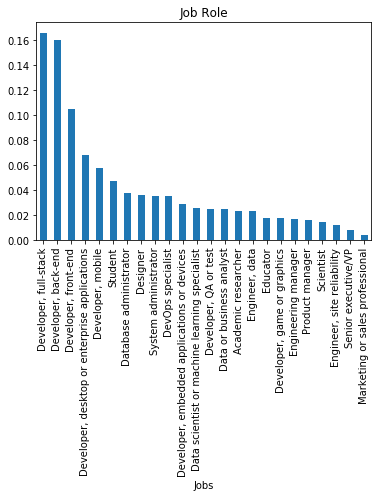

,count
Jobs,
"Developer, full-stack",0.165649
"Developer, back-end",0.159540
"Developer, front-end",0.104551
"Developer, desktop or enterprise applications",0.067935
"Developer, mobile",0.057664
Student,0.046769
Database administrator,0.037350
Designer,0.036024
System administrator,0.035031


In [8]:
list_values = count_lists(df, col='DevType', delim=';')
results = clean_and_plot(df, list_values, col='DevType', title='Job Role', xaxis='Jobs')
results

---
Let's focus on the rows for DevTypes that consider their job or part of their job a "Data scientist or machine learning specialist".  We also want to see those reporting just as a "Data scientist or machine learning specialist" and no other role.  Isolating respondents that only hold a Data Scientist role might help us acquire a clearer picture of their characteristics. This will leave us with 6460 rows of mixed roles and 526 of pure DS/ML respondants to work with. We will also remove the null values:

In [9]:
df = df[df.DevType.notnull()] # Remove all nulls in the DevType column

# Dataframe of non DS/ML respondents
df_non_ds = df[df['DevType'].str.contains('Data scientist or machine learning specialist') == False]

# Dataframe with respondents that state they perform a DS/ML role in some capacity
df_ds = df[df['DevType'].str.contains('Data scientist or machine learning specialist')]

# Dataframe with respondents whom only have a DS/ML role
df_pure_ds = df_ds[df_ds['DevType'] == 'Data scientist or machine learning specialist']

print('Number of rows of type DS/ML: {}\nNumber of rows in non-DS/ML occupations: {}\nPure DS/ML: {}'.
      format(df_ds.shape[0], df_non_ds.shape[0], df_pure_ds.shape[0]))

Number of rows of type DS/ML: 6460
Number of rows in non-DS/ML occupations: 74875
Pure DS/ML: 526


---
Our first characteristic we are interested in is the education levels.  We'll go through mixed DS/ML respondents (those that were a DS/ML in some capacity, pure DS/ML (those that only have a DS/ML role) and the rest of the survey respondents that do not have a DS/ML role in any capacity.

In [10]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'EdLevel']['QuestionText'])[0]

'Which of the following best describes the highest level of formal education that you’ve completed?'

Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           35.6
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              35.0
Other doctoral degree (Ph.D, Ed.D., etc.)                                             12.1
Some college/university study without earning a degree                                 6.5
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5.2
Associate degree                                                                       1.6
Professional degree (JD, MD, etc.)                                                     1.1
Primary/elementary school                                                              1.0
I never completed any formal education                                                 0.5
Name: EdLevel, dtype: float64

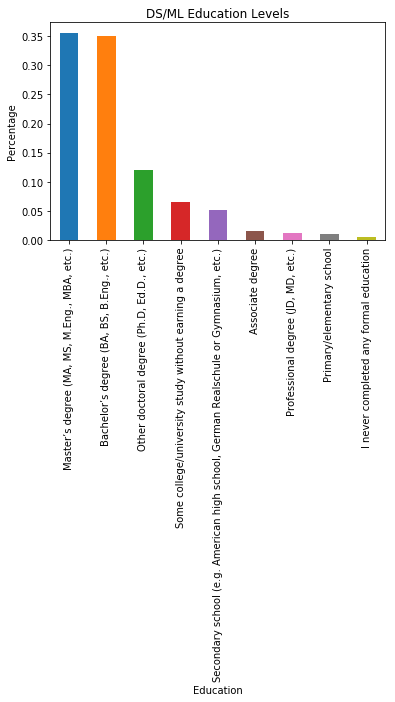

In [11]:
# Mixed DS/ML respondents
chart_values = df_ds.EdLevel.value_counts()
(chart_values/df_ds.shape[0]).plot(kind="bar")
plt.title("DS/ML Education Levels")
plt.ylabel('Percentage')
plt.xlabel('Education')
round(chart_values/df_ds.shape[0]*100,1)

Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           47.9
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              27.0
Other doctoral degree (Ph.D, Ed.D., etc.)                                             19.0
Some college/university study without earning a degree                                 1.9
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1.7
Associate degree                                                                       0.6
Professional degree (JD, MD, etc.)                                                     0.4
Primary/elementary school                                                              0.4
I never completed any formal education                                                 0.4
Name: EdLevel, dtype: float64

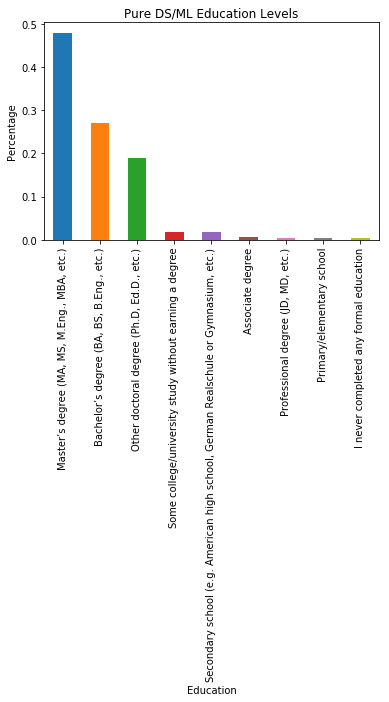

In [12]:
# Pure DS/ML respondents
chart_values = df_pure_ds.EdLevel.value_counts()
(chart_values/df_pure_ds.shape[0]).plot(kind="bar")
plt.title("Pure DS/ML Education Levels")
plt.ylabel('Percentage')
plt.xlabel('Education')
round(chart_values/df_pure_ds.shape[0]*100,1)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              47.2
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           22.1
Some college/university study without earning a degree                                12.3
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8.0
Associate degree                                                                       3.5
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2.0
Professional degree (JD, MD, etc.)                                                     1.4
Primary/elementary school                                                              0.9
I never completed any formal education                                                 0.5
Name: EdLevel, dtype: float64

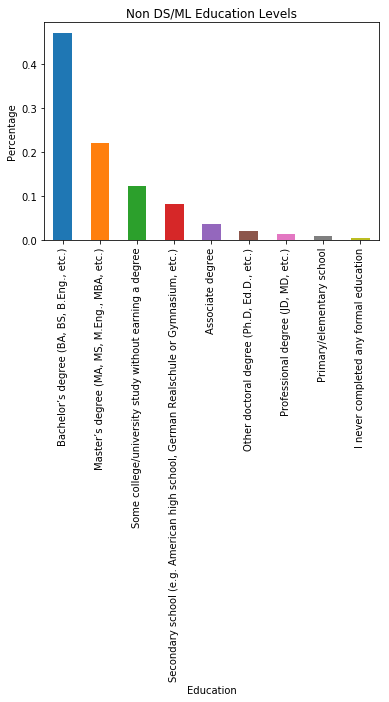

In [13]:
# Non DS/ML role respondents
chart_values = df_non_ds.EdLevel.value_counts()
(chart_values/df_non_ds.shape[0]).plot(kind="bar")
plt.title("Non DS/ML Education Levels")
plt.ylabel('Percentage')
plt.xlabel('Education')
round(chart_values/df_non_ds.shape[0]*100,1)

What we see is there are a significant amount more PhD holders in Data Science roles than the general developer community. Individuals that have a Master's degree and to a slightly lesser extent Bachelor's degree graduates are the most common Data Scientists.

---
Now that we have information about the respondents education levels, can we determine what they majored in?  This will be valuable in order to show what are some majors people in the DS/ML fields come from.  If someone wanted to break into the field, it may prove to be an advantage to have a major that correlates with those already in the field.  

One major limitation is the survey doesn't ask what your major was for the highest level of education you received.  What it does ask is "What was your main or most important field of study?"  It wouldn't be unreasonable to assume that a respondent will not always state the field of study that was most important to them was the highest one achieved.  For example, if a respondent had an undergraduate degree in computer science then later got a Masters in an unrelated field such as business, but they are employed as a developer.  They may consider their computer science degree most important since it correlates more with their current career. 

In [14]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'UndergradMajor']['QuestionText'])[0]

'What was your main or most important field of study?'

Computer science, computer engineering, or software engineering          47.5
Mathematics or statistics                                                11.6
A natural science (ex. biology, chemistry, physics)                      10.4
Another engineering discipline (ex. civil, electrical, mechanical)        8.6
Information systems, information technology, or system administration     3.6
A social science (ex. anthropology, psychology, political science)        2.6
A business discipline (ex. accounting, finance, marketing)                2.3
A humanities discipline (ex. literature, history, philosophy)             1.3
Web development or web design                                             0.9
A health science (ex. nursing, pharmacy, radiology)                       0.6
Fine arts or performing arts (ex. graphic design, music, studio art)      0.6
I never declared a major                                                  0.3
Name: UndergradMajor, dtype: float64

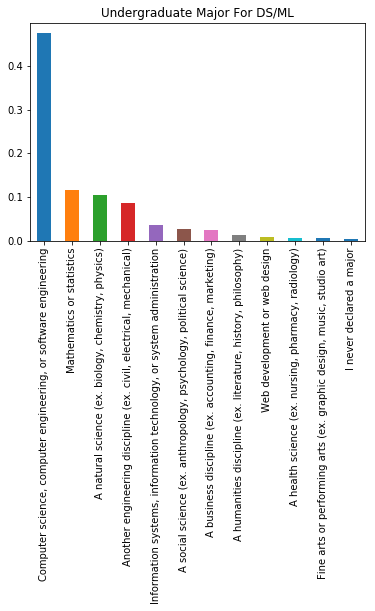

In [15]:
# Mixed DS/ML respondents
chart_values = df_ds.UndergradMajor.value_counts() 
(chart_values/df_ds.shape[0]).plot(kind="bar")
plt.title("Undergraduate Major For DS/ML")
round(chart_values/df_ds.shape[0]*100,1)

Mathematics or statistics                                                30.4
Computer science, computer engineering, or software engineering          28.1
A natural science (ex. biology, chemistry, physics)                      13.1
Another engineering discipline (ex. civil, electrical, mechanical)       10.5
A social science (ex. anthropology, psychology, political science)        4.2
Information systems, information technology, or system administration     3.2
A humanities discipline (ex. literature, history, philosophy)             1.7
A business discipline (ex. accounting, finance, marketing)                1.7
A health science (ex. nursing, pharmacy, radiology)                       0.6
Web development or web design                                             0.4
Fine arts or performing arts (ex. graphic design, music, studio art)      0.2
Name: UndergradMajor, dtype: float64

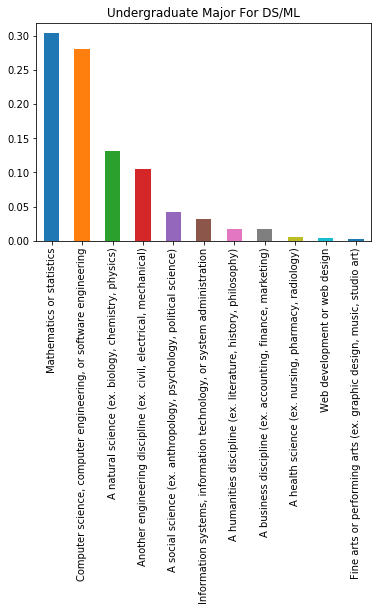

In [16]:
# Pure DS/ML respondents
chart_values = df_pure_ds.UndergradMajor.value_counts() 
(chart_values/df_pure_ds.shape[0]).plot(kind="bar")
plt.title("Undergraduate Major For DS/ML")
round(chart_values/df_pure_ds.shape[0]*100,1)

Computer science, computer engineering, or software engineering          56.2
Another engineering discipline (ex. civil, electrical, mechanical)        7.1
Information systems, information technology, or system administration     6.4
Web development or web design                                             4.3
A natural science (ex. biology, chemistry, physics)                       3.2
Mathematics or statistics                                                 2.7
A business discipline (ex. accounting, finance, marketing)                2.1
A humanities discipline (ex. literature, history, philosophy)             1.8
Fine arts or performing arts (ex. graphic design, music, studio art)      1.5
A social science (ex. anthropology, psychology, political science)        1.5
I never declared a major                                                  1.1
A health science (ex. nursing, pharmacy, radiology)                       0.3
Name: UndergradMajor, dtype: float64

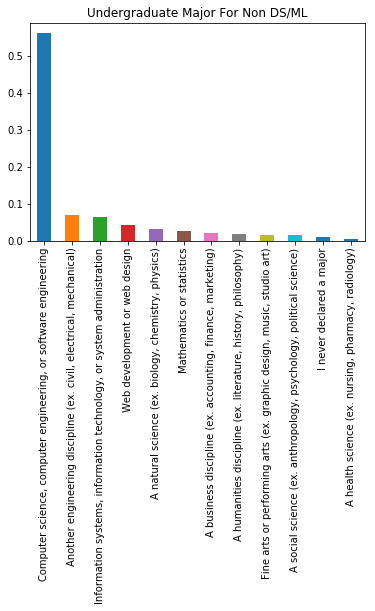

In [17]:
# Non DS/ML role respondents
chart_values = df_non_ds.UndergradMajor.value_counts() 
(chart_values/df_non_ds.shape[0]).plot(kind="bar")
plt.title("Undergraduate Major For Non DS/ML")
round(chart_values/df_non_ds.shape[0]*100,1)

If we believe that most import field of study translates to a graduate degree and higher with a relatively high frequency how does the above sets of charts help us? It shows us that Data Scientists come from a far broader spectrum of academic backgrounds than the average developer. Just looking at pure Data Scientists, they mostly came from a mathematics or statistics background with computer science a close second. There is also a respectable amount of other engineering disciples and natural science backgrounds.

---
Salary and hours worked doesn't feel like a good characteristic for someone wanting to become a Data Scientist as those are not attributes you can really acquiring prior that increases your chances.  Perhaps it can, but the data doesn't allow us to dig that deep.  Out of curiosity, lets take a look at the average compensation (converted to USD) and average hours worked to maybe see if there really isn't anything there we can work with.

In [18]:
# Questions presented in the survey to the respondents
comp = list(schema[schema['Column'] == 'CompTotal']['QuestionText'])[0]
hours = list(schema[schema['Column'] == 'WorkWeekHrs']['QuestionText'])[0]
print('Salary question: \n{}\n\nWorks worked question: \n{}'.format(comp,hours))

Salary question: 
What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.

Works worked question: 
On average, how many hours per week do you work?


In [19]:
# Mixed DS/ML respondents
comp = df_ds.ConvertedComp.mean()
hours = df_ds.WorkWeekHrs.mean()

print("DS/ML Compensation: ${:,.2f} and Hours: {}".format(comp, round(hours,1)))

DS/ML Compensation: $142,191.27 and Hours: 42.5


In [20]:
# Pure DS/ML respondents
comp = df_pure_ds.ConvertedComp.mean()
hours = df_pure_ds.WorkWeekHrs.mean()

print("Pure DS/ML Compensation: ${:,.2f} and Hours: {}".format(comp, round(hours,1)))

Pure DS/ML Compensation: $190,776.93 and Hours: 42.0


In [21]:
# Non DS/ML role respondents
comp = df_non_ds.ConvertedComp.mean()
hours = df_non_ds.WorkWeekHrs.mean()

print("Non DS/ML Compensation: ${:,.2f} and Hours: {}".format(comp, round(hours,1)))

Non DS/ML Compensation: $125,578.58 and Hours: 42.1


The data is interesing, at least in my opinion, since it does show Data Scietists (both mixed and pure) do make more than the average non DS/ML respondent.  The hours worked are not significantly different either.  

---
The last characteristic we will look at is what are other roles DS/ML might find themselves. Since 526 report as only being a DS/ML while 5,934 report to have other job roles but are also doing some DS/ML work, there are significantly more respondents that do other work.  We want to see what those roles are.

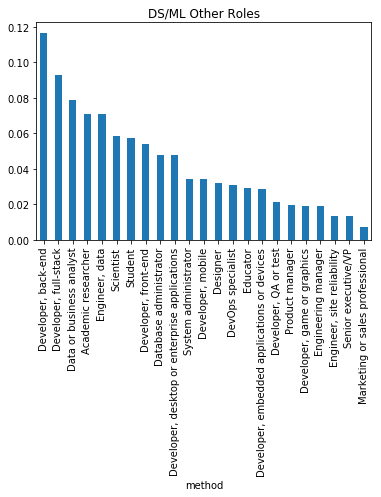

method
Developer, back-end                              11.7
Developer, full-stack                             9.3
Data or business analyst                          7.9
Academic researcher                               7.1
Engineer, data                                    7.1
Scientist                                         5.9
Student                                           5.7
Developer, front-end                              5.4
Database administrator                            4.8
Developer, desktop or enterprise applications     4.8
System administrator                              3.5
Developer, mobile                                 3.4
Designer                                          3.2
DevOps specialist                                 3.1
Educator                                          2.9
Developer, embedded applications or devices       2.9
Developer, QA or test                             2.1
Product manager                                   2.0
Developer, game or gr

In [22]:
list_values = count_lists(df_ds, col='DevType', delim=';')
list_values.remove('Data scientist or machine learning specialist')
props_df = clean_and_plot(df_ds, list_values, col='DevType', title='DS/ML Other Roles')
round(props_df['count'] * 100, 1)

How is this helpful to someone looking to be a DS/ML?  The variety of other roles the respondents identified that are outside of an IT focus (Data/business analyst, academic researcher, scientist) seems to imply that it is not infeasable to have a DS/ML position in a company without a IT background.  This may be valuable to those looking at a DS/ML career path, but they may lack a strong technical background.  

---
We now want to dive into the second question regarding technologies a Data Scientist may use.  The survey data has a few good questions that might shed light on that question.  First we look at the programming languages that are worked with.

In [23]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'LanguageWorkedWith']['QuestionText'])[0]

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

It needs to be noted that the question, acording to the schema, for languages worked with is the same for the results from languages desired going forward.  Stack Overlow apears to have asked just this question, but they had muliple boxes to state the current ones they worked with and if they wanted to continue working with them.  Stack Overlow then broke out the results into two different columnns 'LanguageWorkedWith' and 'LanguageDesireNextYear'.

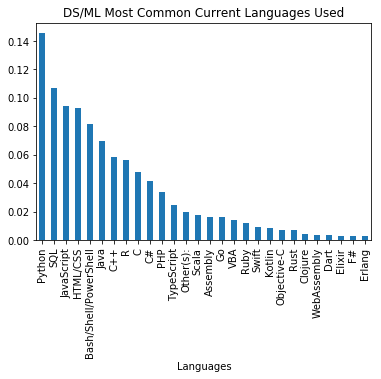

,count
Languages,
Python,0.145688
SQL,0.107311
JavaScript,0.094349
HTML/CSS,0.092615
Bash/Shell/PowerShell,0.081699
Java,0.069731
C++,0.058730
R,0.056143
C,0.047587


In [24]:
# Mixed DS/ML respondents
list_values = count_lists(df_ds, col='LanguageWorkedWith', delim=';')
props_df = clean_and_plot(df_ds, list_values, col='LanguageWorkedWith', title='DS/ML Most Common Current Languages Used',
                         xaxis='Languages')
props_df

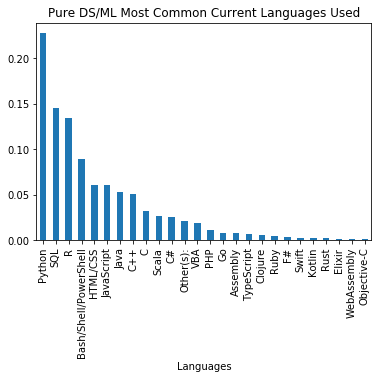

,count
Languages,
Python,0.227521
SQL,0.144560
R,0.134128
Bash/Shell/PowerShell,0.088922
HTML/CSS,0.060606
JavaScript,0.060109
Java,0.053154
C++,0.050671
C,0.032290


In [25]:
# Pure DS/ML respondents
list_values = count_lists(df_pure_ds, col='LanguageWorkedWith', delim=';')
props_df = clean_and_plot(df_pure_ds, list_values, col='LanguageWorkedWith', title='Pure DS/ML Most Common Current Languages Used',
                         xaxis='Languages')
props_df

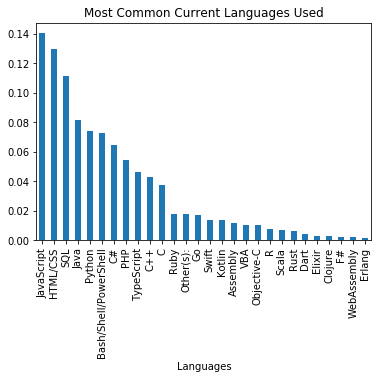

,count
Languages,
JavaScript,0.140603
HTML/CSS,0.129756
SQL,0.111085
Java,0.081637
Python,0.074138
Bash/Shell/PowerShell,0.072348
C#,0.064319
PHP,0.054185
TypeScript,0.045921


In [26]:
# Non DS/ML role respondents
list_values = count_lists(df_non_ds, col='LanguageWorkedWith', delim=';')
props_df = clean_and_plot(df_non_ds, list_values, col='LanguageWorkedWith', title='Most Common Current Languages Used',
                         xaxis='Languages')
props_df

In both the mixed and pure DS/ML we see Python is clearly the most used language with SQL a respectable second.  What is interesting is SQL and Python are well used by the non DS/ML respondents.  It isn't a secret that Python is one of or the most popular language in Data Science, but what could be useful information is the fact that non Data Science use it as much as they do.  Learning Python is valuable for breaking into the Data Science field, but it also is valuable if you want to look towards another career path outside of DS/ML.

---
Now lets see what languages respondents want to learn in 2020:

In [27]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'LanguageDesireNextYear']['QuestionText'])[0]

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

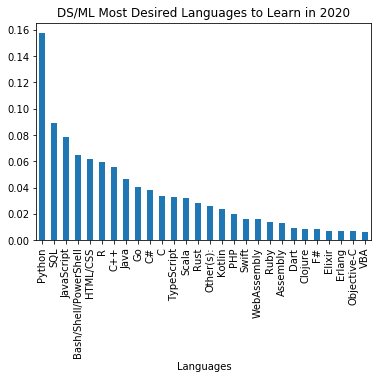

,count
Languages,
Python,0.157642
SQL,0.089442
JavaScript,0.078527
Bash/Shell/PowerShell,0.064442
HTML/CSS,0.062024
R,0.059410
C++,0.055913
Java,0.046600
Go,0.040064


In [28]:
# Mixed DS/ML respondents
list_values = count_lists(df_ds, col='LanguageDesireNextYear', delim=';')
props_df = clean_and_plot(df_ds, list_values, col='LanguageDesireNextYear', title='DS/ML Most Desired Languages to Learn in 2020',
                         xaxis='Languages')
props_df

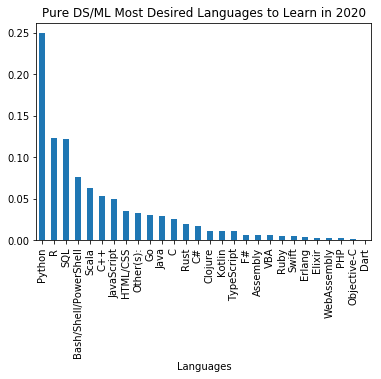

,count
Languages,
Python,0.249848
R,0.123404
SQL,0.121581
Bash/Shell/PowerShell,0.075988
Scala,0.063222
C++,0.052888
JavaScript,0.049848
HTML/CSS,0.034650
Other(s):,0.032219


In [29]:
# Pure DS/ML respondents
list_values = count_lists(df_pure_ds, col='LanguageDesireNextYear', delim=';')
props_df = clean_and_plot(df_pure_ds, list_values, col='LanguageDesireNextYear', title='Pure DS/ML Most Desired Languages to Learn in 2020',
                         xaxis='Languages')
props_df

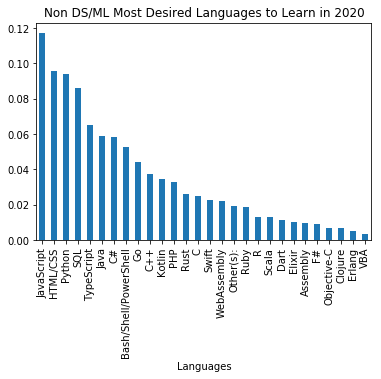

,count
Languages,
JavaScript,0.117143
HTML/CSS,0.095485
Python,0.093760
SQL,0.085894
TypeScript,0.065104
Java,0.058808
C#,0.058422
Bash/Shell/PowerShell,0.052628
Go,0.044356


In [30]:
# Non DS/ML role respondents
list_values = count_lists(df_non_ds, col='LanguageDesireNextYear', delim=';')
props_df = clean_and_plot(df_non_ds, list_values, col='LanguageDesireNextYear', title='Non DS/ML Most Desired Languages to Learn in 2020',
                         xaxis='Languages')
props_df

What is interesting is a greater desire to learn Python than R in 2020 which looks to solidify Python's dominance in the Data Science domain. Scala for the pure DS/ML is moving up list in 2020 more than the other languages.  Are DS/ML looking at this language as a rival to Python in any way?  We don't have the data in this survey to answer that; however, this may be a language for aspiring DS/ML practitioners to look into.

---
Let's take a look at the most common DB systems respondents used to see if we can gather any useful information:

In [31]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'DatabaseWorkedWith']['QuestionText'])[0]

'Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?   (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

It needs to be noted that the question, acording to the schema and just like the previous languages question, for databases worked with is the same for the results from databases desired going forward.  Stack Overlow apears to have asked just this question, but they had muliple boxes to state the current ones they worked with and if they wanted to continue working with them.  Stack Overlow then broke out the results into two different columnns 'DatabaseWorkedWith' and 'DatabaseDesireNextYear'.

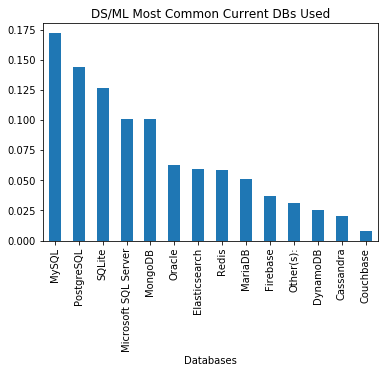

,count
Databases,
MySQL,0.172229
PostgreSQL,0.144505
SQLite,0.126552
Microsoft SQL Server,0.100771
MongoDB,0.100712
Oracle,0.063041
Elasticsearch,0.059509
Redis,0.058862
MariaDB,0.051151


In [32]:
# Mixed DS/ML respondents
list_values = count_lists(df_ds, col='DatabaseWorkedWith', delim=';')
props_df = clean_and_plot(df_ds, list_values, col='DatabaseWorkedWith', title='DS/ML Most Common Current DBs Used',
                         xaxis='Databases')
props_df

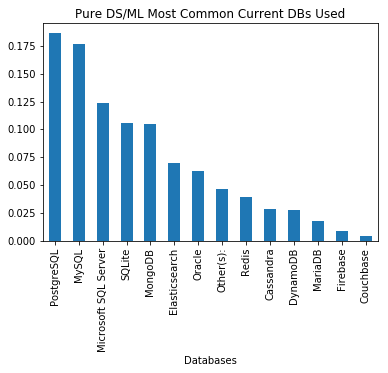

,count
Databases,
PostgreSQL,0.186285
MySQL,0.177073
Microsoft SQL Server,0.123849
SQLite,0.105425
MongoDB,0.104401
Elasticsearch,0.069601
Oracle,0.062436
Other(s):,0.046059
Redis,0.038895


In [33]:
# Pure DS/ML respondents
list_values = count_lists(df_pure_ds, col='DatabaseWorkedWith', delim=';')
props_df = clean_and_plot(df_pure_ds, list_values, col='DatabaseWorkedWith', title='Pure DS/ML Most Common Current DBs Used',
                         xaxis='Databases')
props_df

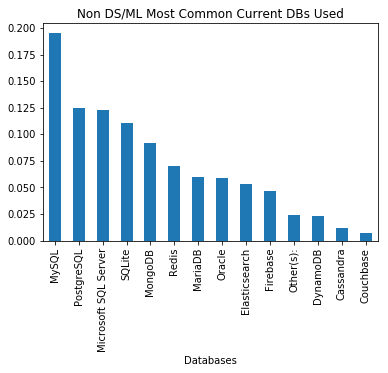

,count
Databases,
MySQL,0.194977
PostgreSQL,0.124370
Microsoft SQL Server,0.122556
SQLite,0.111103
MongoDB,0.091891
Redis,0.070462
MariaDB,0.060150
Oracle,0.059131
Elasticsearch,0.052912


In [34]:
# Non DS/ML role respondents
list_values = count_lists(df_non_ds, col='DatabaseWorkedWith', delim=';')
props_df = clean_and_plot(df_non_ds, list_values, col='DatabaseWorkedWith', title='Non DS/ML Most Common Current DBs Used',
                         xaxis='Databases')
props_df

PostgreSQL and MySQL are the two most common across all respondents with PostgreSQL being the most popular for the pure DS/ML group with MySQL not that far behind.  Learning these database systems would be beneficial for Data Scientist, but lets see if we can find a trend for next year based on the database they want to use.

In [35]:
# Question presented in the survey to the respondents
list(schema[schema['Column'] == 'DatabaseDesireNextYear']['QuestionText'])[0]

'Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?   (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

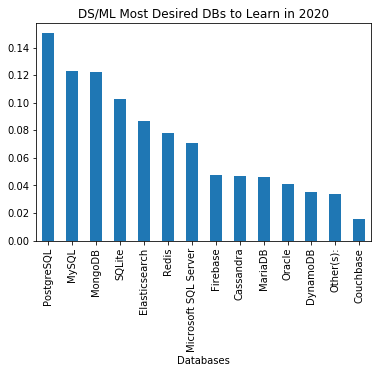

,count
Databases,
PostgreSQL,0.150372
MySQL,0.123322
MongoDB,0.122083
SQLite,0.102659
Elasticsearch,0.086886
Redis,0.078347
Microsoft SQL Server,0.070525
Firebase,0.047451
Cassandra,0.046995


In [36]:
# Mixed DS/ML respondents
list_values = count_lists(df_ds, col='DatabaseDesireNextYear', delim=';')
props_df = clean_and_plot(df_ds, list_values, col='DatabaseDesireNextYear', title='DS/ML Most Desired DBs to Learn in 2020',
                         xaxis='Databases')
props_df

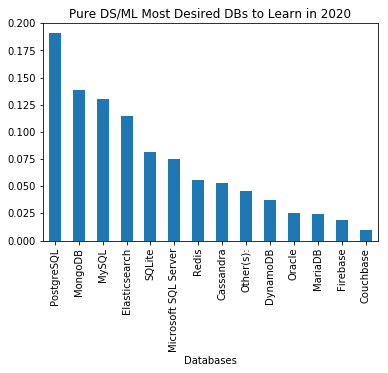

,count
Databases,
PostgreSQL,0.190667
MongoDB,0.138667
MySQL,0.130667
Elasticsearch,0.114667
SQLite,0.081333
Microsoft SQL Server,0.074667
Redis,0.056000
Cassandra,0.053333
Other(s):,0.045333


In [37]:
# Pure DS/ML respondents
list_values = count_lists(df_pure_ds, col='DatabaseDesireNextYear', delim=';')
props_df = clean_and_plot(df_pure_ds, list_values, col='DatabaseDesireNextYear', title='Pure DS/ML Most Desired DBs to Learn in 2020',
                         xaxis='Databases')
props_df

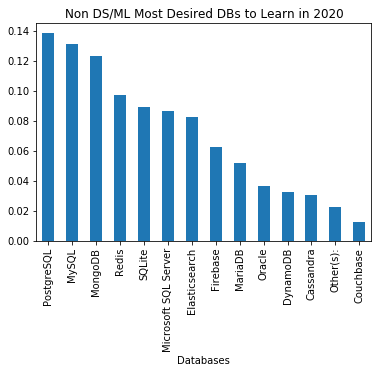

,count
Databases,
PostgreSQL,0.138607
MySQL,0.131481
MongoDB,0.123739
Redis,0.097483
SQLite,0.089536
Microsoft SQL Server,0.086650
Elasticsearch,0.082785
Firebase,0.062591
MariaDB,0.052162


In [38]:
# Non DS/ML role respondents
list_values = count_lists(df_non_ds, col='DatabaseDesireNextYear', delim=';')
props_df = clean_and_plot(df_non_ds, list_values, col='DatabaseDesireNextYear', title='Non DS/ML Most Desired DBs to Learn in 2020',
                         xaxis='Databases')
props_df

We see that the pure Data Scientists still have a desire to work with PostgrSQL and to a lesser extent MySQL; however, we see a rise in the interest in MongoDB and Elasticsearch.  These other database systems are gaining significant ground on the other systems; therefore, future Data Scientists may want to look into those if they wish to break into the field.